### TAREFAS

RCNN
Pegar o resultado do selective search (subimagens do cv2), fazer o resize disso e passar o modelo convolucional 

* usar uma regressão para verificar aonde esta o objeto
* svm para classificar que objeto é aquele

Base de dados: Gato ou Cachorro
Dica: Começe com o código do selective search, e tente pegar cada box e passsar para uma rede classifcadora de imagens como a da última aula.

In [3]:
# imports

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
# selective search


In [4]:
import cv2

cv2.setUseOptimized(True)
cv2.setNumThreads(8)

In [5]:
image = cv2.imread('image.JPG')

In [6]:
img = image
gs = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
gs.setBaseImage(img)

In [36]:
from google.colab.patches import cv2_imshow

rects = gs.process()
nb_rects = 10

while True:
    wimg = img.copy()

    for i in range(len(rects)):
        if (i < nb_rects):
            x, y, w, h = rects[i]
            cv2.rectangle(wimg, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)

    cv2_imshow(wimg);
    c = cv2.waitKey()

    if (c == 100):
        nb_rects += 10

    elif (c == 97 and nb_rects > 10):
        nb_rects -= 10

    elif (c == 113):
        break

cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

In [14]:
# ss.switchToSelectiveSearchQuality()
gs.switchToSelectiveSearchFast()
rects = gs.process()

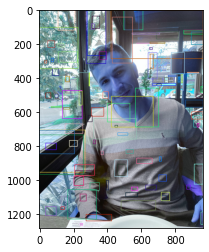

In [26]:
k = 100
retangulos_aleatorios = retangulos[np.random.randint(low=0, high=retangulos.shape[0], size=k)]
output = image.copy()
for (a, b, w, h) in retangulos[0:100, ]:
  color=[np.random.randint(0,255) for j in range(0, 3)]
  cv2.rectangle(output, (a,b ), (a + w, b + h), color, 2)

plt.imshow(output)

In [ ]:
from google.colab.patches import cv2_imshow
# loop over the region proposals in chunks (so we can better
# visualize them)
for i in range(0, len(rects), 100):
	# clone the original image so we can draw on it
	output = image.copy()
	# loop over the current subset of region proposals
	for (x, y, w, h) in rects[i:i + 100]:
		# draw the region proposal bounding box on the image
		color = [np.random.randint(0, 255) for j in range(0, 3)]
		cv2.rectangle(output, (x, y), (x + w, y + h), color, 2)
	# show the output image
	cv2_imshow(output)
	# cv2.imshow("Output", output)
	key = cv2.waitKey(0) & 0xFF
	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break


A program demonstrating the use and capabilities of a particular image segmentation algorithm described
in Jasper R. R. Uijlings, Koen E. A. van de Sande, Theo Gevers, Arnold W. M. Smeulders:
    "Selective Search for Object Recognition"
International Journal of Computer Vision, Volume 104 (2), page 154-171, 2013
Usage:
    ./selectivesearchsegmentation_demo.py input_image (single|fast|quality)
Use "a" to display less rects, 'd' to display more rects, "q" to quit.



SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
